# HMMA238 - TP Noté - Fanchon Herman

# Exercice 1 - Le jeu de la vie

In [1]:
from utils import calcul_nb_voisins
from IPython.display import Image
from utils import iteration_jeu
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
#import matplotlib.pylab as plt

### Question 1-2-3

Nous allons tout d'abord créer la chaîne de caractère $filename$ correspondant au nom de notre fichier. Puis, on a créer la variable taille_str qui compte le nombre de caractère dans la chaîne de caractère $filename$. Enfin, on a créer la variable $ma$_$graine$ qui vaut le reste de la division euclidienne de $taille$_$str$ par 6.


In [2]:
filename = "HMMA238_TP_fanchonherman.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print("La variable taille_str vaut ", taille_str)
print("La variable ma_graine vaut ", ma_graine)

La variable taille_str vaut  30
La variable ma_graine vaut  0


## Implémentation sans numpy

On définit ci-dessous la fonction $calcul$_$nb$_$voisins$

### Question 4

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


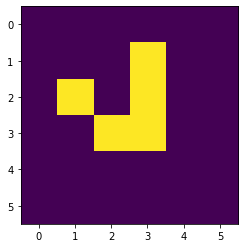

In [3]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

plt.imshow(Z)

N = calcul_nb_voisins(Z)
print(N)

In [4]:
# 0 représente une cellule morte et 1 une cellule vivante
# la fonction prends en paramètre une liste de liste et renvoie une liste de ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,liste
# forme renvoie le nombre de liste à l'intérieur de la grande liste puis le nombre d'élements dans la première liste
# [0, ] * (forme[0]) créer une liste contenant 6 (1ere valeur de forme) zéros
# N renvoie une liste contenant 6 (2eme valeur de forme) liste de zéros # initialisation ????
# x va de 1 a 4 (ne prends pas la dernière valeur qui est 5) (interval ouvert) (entiers ie 1 2 3 4)
# idem pour y car forme[0]=forme[1] pour Z
# N[x][y] la yème valeur de la xème liste
# la premiere liste ne change jamais

# ex : pour x=1 et y=1
# N[1][1] = Z[0][0]+Z[1][0]+Z[2][0]+Z[0][1]+Z[2][1]+Z[0][2]+Z[1][2]+Z[2][2]
# = 0+0+0+0+1+0+0+=1

# cette fonction permet de calculer le nombre de voisins vivants (avec comme convention 0=mort) 


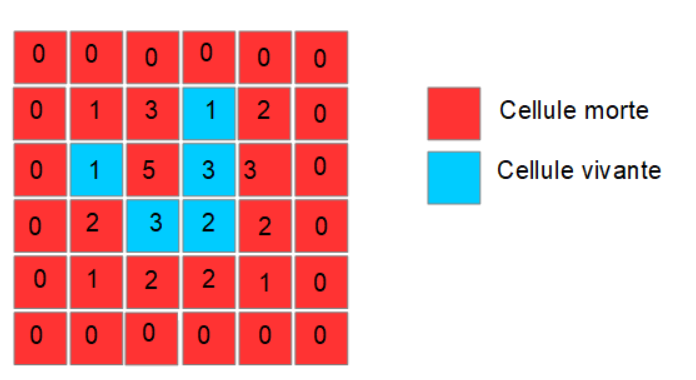

In [5]:
Image(filename='img.PNG')
# les couleurs rouges et bleues correspondent à l'initialisation du jeu
# les numéros dans les cellules correspondent au nombre de voisins vivants après une itération 

In [6]:
help(iteration_jeu)
# exemple 
print(iteration_jeu(Z))
# pour la cellule vivante 2ème ligne 4ème colonne
# apres une iteration on constate qu'elle est devenue morte 
# ceci est normal étant donné qu'elle possède un voisin vivant donc elle décède à la génération suivante 

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Cette fonction prends en entrée et renvoie en sortie une liste de liste
    Les boucles ne prennent pas en compte les pourtours de la grille car
    considéré inactif/mort. En entrée on a une liste de liste qui représente l'initialisation du jeu
    En sortie on a une liste de liste qui représente le jeu à l'étape suivante
    Le code effectue les transitions a) b) c) et d)

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


### Question 5-6

On souhaite maintenant afficher les 9 itérations des étapes du jeu en utilisant la boucle for.

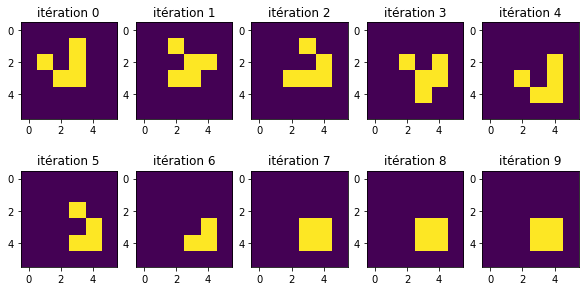

In [12]:
plt.figure(figsize=(10, 5))
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

for i in range(1, 11):
    plt.subplot(2, 5, i)
    Z = np.array(Z)
    plt.imshow(Z)
    Z_etape = iteration_jeu(Z)
    plt.title("itération " + str(i-1))

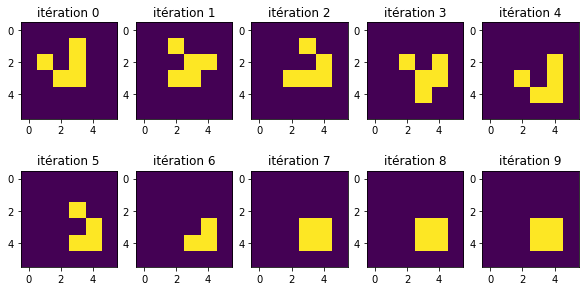

In [23]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]] 

def iterations(mat, fonction):
    plt.figure(figsize=(10, 5))
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        mat = np.array(mat)
        plt.imshow(mat)
        mat_etape = fonction(mat)
        plt.title("itération " + str(i-1))
      
        
iterations(Z, iteration_jeu)

In [8]:
# entre l'iteration 0 et 4 on constate que l'on obtient la meme chose à quelques décalage près 
# ie decalage de 1 vers la droite et de 1 vers le bas 
# après l'iteration 7 on obtient la meme chose on a donc qqch de stable 

## Implémentation avec numpy

### Question 7

In [9]:
vect = np.array([0, 1, 0, 0, 1, 1])
nb_vect = np.zeros(vect.shape)
# créer un array de la même forme que vect contenant que des 0
nb_vect[1:-1] += (vect[:-2] + vect[2:])
# change tout les élements de nb_vect sauf le 1er et le dernier
# vect[:-2] sans les 2 derniers élements
# vect[2:] sans les 2 premiers élements
print(vect)
print(nb_vect)

# nb_vect[1:-1] += (vect[:-2] + vect[2:])
# nb_vect[1:-1]  = nb_vect[1:-1] + (vect[:-2] + vect[2:])
# vect[:-2] + vect[2:] donne [0 1 1 1 ]
# nb_vect[1:-1] donne [0 0 0 0] + [0 1 1 1] = [0 1 1 1]
# donc nb_vect = [0 0 1 1 1 0]

# nb_vect calcul le nombre de voisins du vecteur vect

[0 1 0 0 1 1]
[0. 0. 1. 1. 1. 0.]


### Question 8

In [10]:
def calcul_nb_voisins_np(Z):
    Z = np.array(Z)
    nb_voisins = np.zeros(Z.shape)
    nb_voisins[1:-1, 1:-1] = Z[:-2, :-2] + Z[2:, 2:] + Z[2:, :-2] + Z[:-2, 2:] \
    + Z[1:-1, :-2] + Z[1:-1, 2:] + Z[:-2, 1:-1] + Z[2:, 1:-1]
    return(nb_voisins)

In [11]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]
calcul_nb_voisins_np(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [12]:
np.allclose(calcul_nb_voisins_np(Z), N)
# verification

True

### Question 9

In [13]:
def iteration_jeu_np(Z):
    Z = np.array(Z)
    N = calcul_nb_voisins_np(Z)
    for x in range(1, np.shape(Z)[0]-1):
        for y in range(1, np.shape(Z)[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [14]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]
iteration_jeu_np(Z)
np.allclose(iteration_jeu_np(Z), iteration_jeu(Z))
# verification

True

### Question 10

In [15]:
def jeu_np(Z_in, nb_iter):
    for i in range(1, nb_iter+1):
        Z_in = iteration_jeu_np(Z_in)
    return (Z_in)

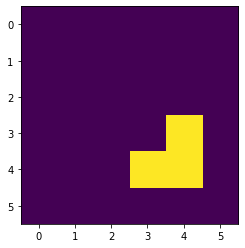

In [16]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0,  0]]
plt.imshow(jeu_np(Z, 6))

### Question 11

In [17]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

<IPython.core.display.Javascript object>


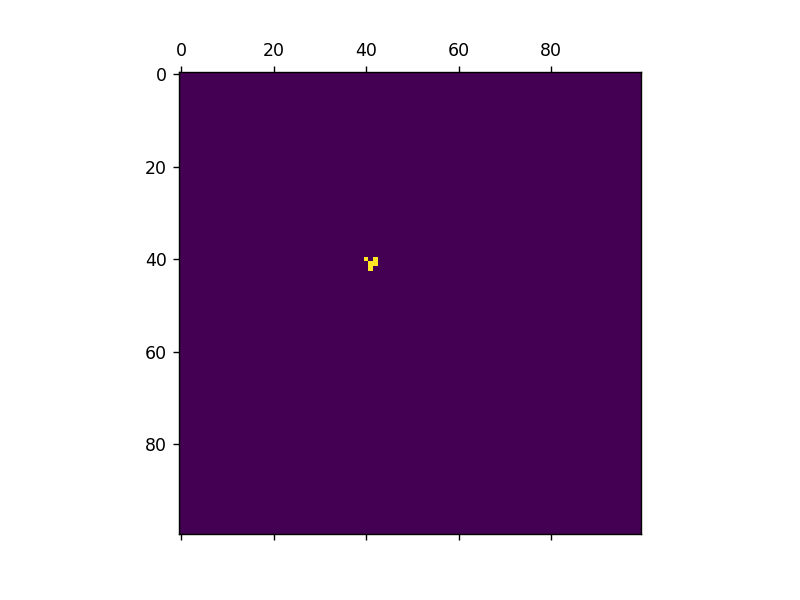

In [25]:
%matplotlib notebook
def animate(i):
    mat.set_array(jeu_np(Z_huge, i))


fig, ax = plt.subplots()
mat = ax.matshow(Z_huge)
ani = animation.FuncAnimation(fig, animate, frames=200)
plt.show()

### Question 12

In [19]:
A = np.random.binomial(n=1, p=0.1, size=98*98).reshape(98,98)
prop_active = (1 + ma_graine) * 10 / 100
print("La variable prop_active vaut ", prop_active)
A_bis = np.zeros((100, 100))
A_bis[1:-1, 1:-1] = A
print(A_bis)

La variable prop_active vaut  0.1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


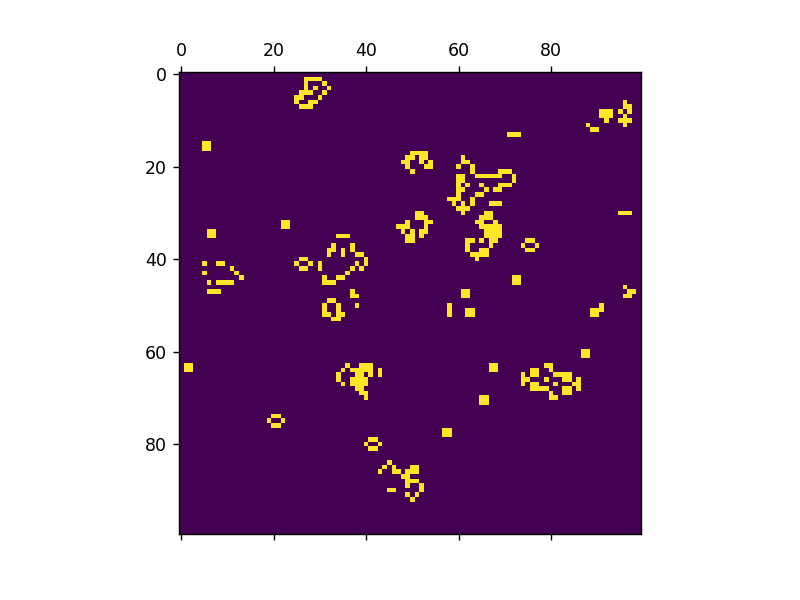

In [23]:
def animate(i):
    mat.set_array(jeu_np(A_bis, i))

fig, ax = plt.subplots()
mat = ax.matshow(A_bis)
ani_bis = animation.FuncAnimation(fig, animate, frames=200, blit=True)
plt.show()

### Question 13

<IPython.core.display.Javascript object>


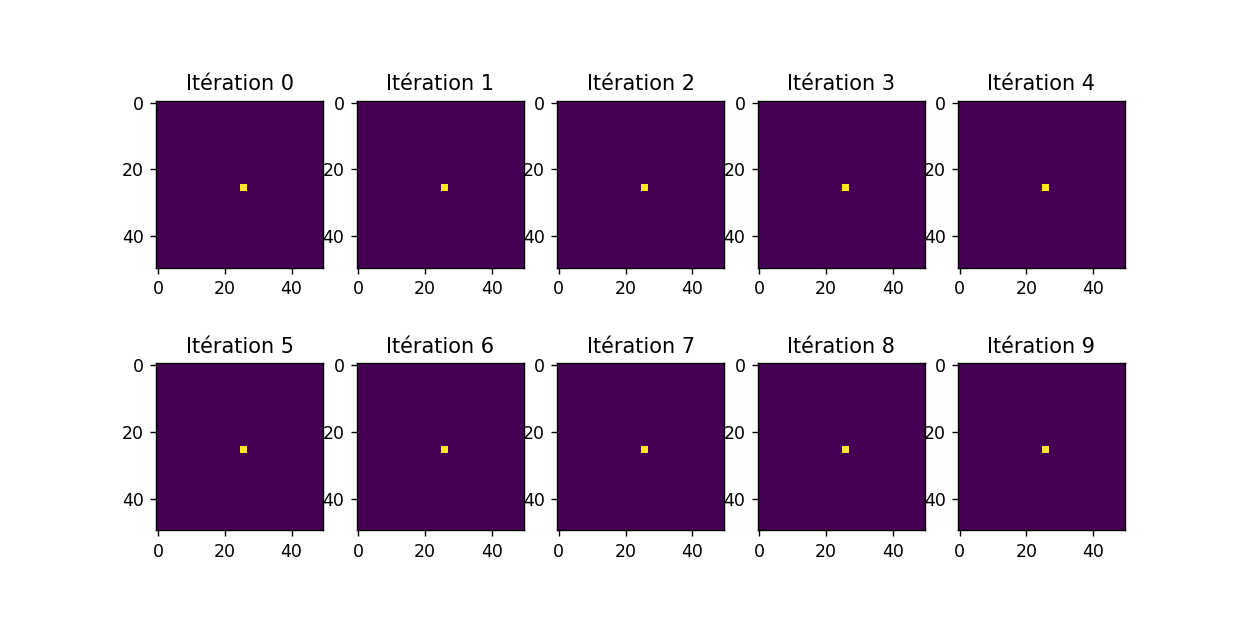

In [26]:
mat1 = np.zeros((50, 50))
mat2 = np.zeros((50, 50))
mat3 = np.zeros((50, 50))

mat1[25, 25] = mat1[25, 26] = mat1[26, 25] = mat1[26, 26] = 1

plt.figure(figsize=(10, 5))

for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(mat1)
    Z_etape = iteration_jeu(mat1)
    plt.title("itération " + str(i-1))
    
# matrice de taille 5050
# pour faire un carre l'element 2525 vaut 1 

In [3]:
def iterations(mat,fonction):
    plt.figure(figsize=(10, 5))
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        mat = np.array(mat)
        plt.imshow(mat)
        mat_etape = fonction
        plt.title("itération " + str(i-1))

### Question 14

In [ ]:
class JeuDeLaVie:

    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros(n_1, n_2, _time_T+1)
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))
        
    def play(self):
#        temps = 1
#        while (temps <= self.time_T)
#        self._historic_state[:, :, t-1] =

    def plot(self):
        
        
        